In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

2024-09-18 16:04:57.817754: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-18 16:04:57.824139: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:04:57.877851: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-18 16:04:57.934320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 16:04:57.987814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Load and prepare the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Create the model

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(filters = 6, kernel_size=5, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(filters = 16, kernel_size=5, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, validation_split=0.2)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5289 - loss: 1.6392 - val_accuracy: 0.8988 - val_loss: 0.3469
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9090 - loss: 0.3178 - val_accuracy: 0.9293 - val_loss: 0.2320
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9362 - loss: 0.2147 - val_accuracy: 0.9532 - val_loss: 0.1574
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9550 - loss: 0.1528 - val_accuracy: 0.9628 - val_loss: 0.1254
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9624 - loss: 0.1234 - val_accuracy: 0.9650 - val_loss: 0.1148
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9667 - loss: 0.1081 - val_accuracy: 0.9719 - val_loss: 0.0935
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9730 - loss: 0.0897 - val_accuracy: 0.9729 - val_loss: 0.0900
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9749 - loss: 0.0834 - val_accuracy: 0.9763 - v

[]

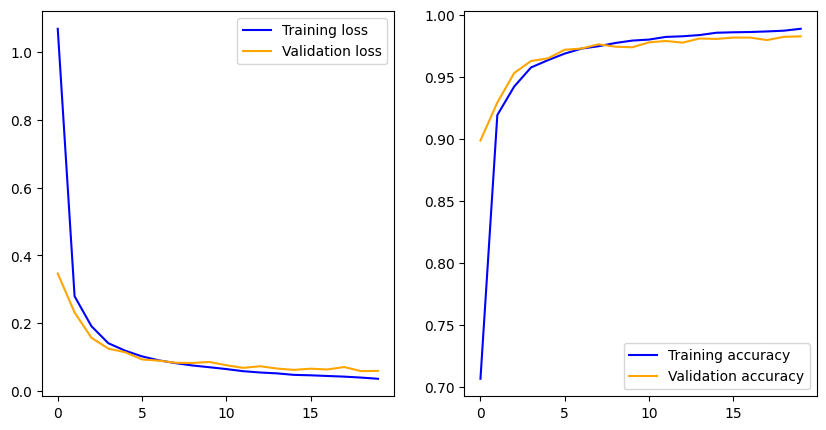

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.history['loss'], color='blue', label='Training loss')
ax[0].plot(history.history['val_loss'], color='orange', label='Validation loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='blue', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')
ax[1].legend()

plt.plot()

In [17]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)

cm = confusion_matrix(np.argmax(y_test, axis = 1), predictions)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 976    0    0    0    0    0    0    1    2    1]
 [   0 1129    2    0    0    0    1    2    1    0]
 [   2    1 1024    1    1    0    0    2    1    0]
 [   1    0    1 1003    0    1    0    2    2    0]
 [   0    1    3    0  973    0    1    1    0    3]
 [   3    0    0   11    0  872    2    2    1    1]
 [   3    2    1    1    5    2  942    0    2    0]
 [   1    4    9    3    0    0    0 1005    2    4]
 [   2    2    3    8    0    0    2    1  954    2]
 [   4    2    0    8    4    1    0    1    2  987]]


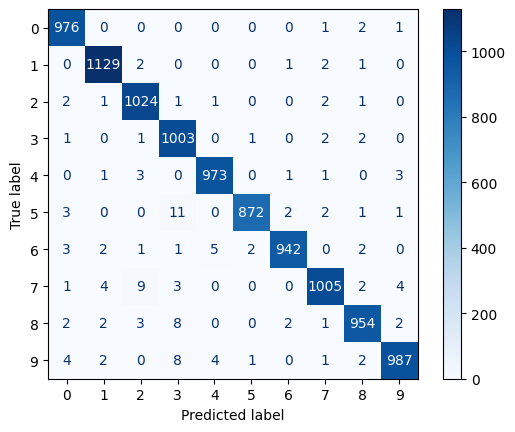

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)